<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/AI_W6_11_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fd919c6d3280f0454fd2c63330efca925e8b47c3bb51c2e52cd90fa39ce3f2c4
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
# CONTROL THE DC MOTOR

127.61758501883136


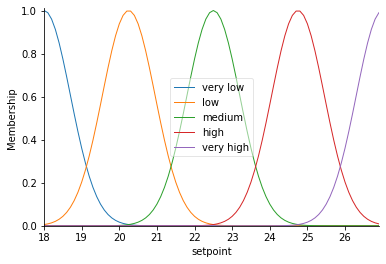

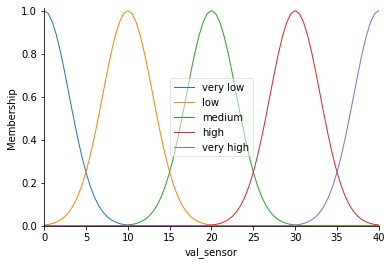

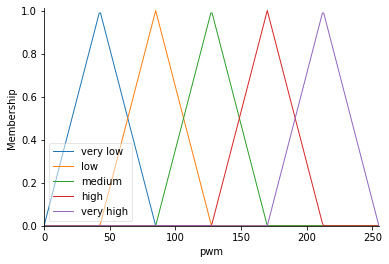

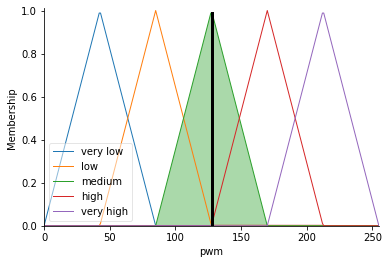

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

setpoint = ctrl.Antecedent(np.arange(18,27,0.1), 'setpoint')
val_sensor = ctrl.Antecedent(np.arange(0,40.5,0.5), 'val_sensor')
pwm = ctrl.Consequent(np.arange(0,256,1), 'pwm')

setpoint['very low'] = fuzz.gaussmf(setpoint.universe, 18, 0.7)
setpoint['low'] = fuzz.gaussmf(setpoint.universe, 20.25, 0.7)
setpoint['medium'] = fuzz.gaussmf(setpoint.universe, 22.5, 0.7)
setpoint['high'] = fuzz.gaussmf(setpoint.universe, 24.75, 0.7)
setpoint['very high'] = fuzz.gaussmf(setpoint.universe, 27, 0.7)
setpoint.view()

val_sensor['very low'] = fuzz.gaussmf(val_sensor.universe, 0, 3)
val_sensor['low'] = fuzz.gaussmf(val_sensor.universe, 10, 3)
val_sensor['medium'] = fuzz.gaussmf(val_sensor.universe, 20, 3)
val_sensor['high'] = fuzz.gaussmf(val_sensor.universe, 30, 3)
val_sensor['very high'] = fuzz.gaussmf(val_sensor.universe, 40, 3)
val_sensor.view()

pwm['very low'] = fuzz.trimf(pwm.universe, [0, 42.5, 85])
pwm['low'] = fuzz.trimf(pwm.universe, [42.5, 85, 127.5])
pwm['medium'] = fuzz.trimf(pwm.universe, [85, 127.5, 170])
pwm['high'] = fuzz.trimf(pwm.universe, [127.5, 170, 212.5])
pwm['very high'] = fuzz.trimf(pwm.universe, [170, 212.5, 255])
pwm.view()

rule1 = ctrl.Rule((setpoint['very low'] & val_sensor['very low']) |
                  (setpoint['low'] & val_sensor['very low']) |
                  (setpoint['very low'] & val_sensor['low']), pwm['very low'])
rule2 = ctrl.Rule((setpoint['medium'] & val_sensor['very low']) |
                  (setpoint['high'] & val_sensor['very low']) |
                  (setpoint['low'] & val_sensor['low']) |
                  (setpoint['medium'] & val_sensor['low']) |
                  (setpoint['very low'] & val_sensor['medium']) |
                  (setpoint['low'] & val_sensor['medium']) |
                  (setpoint['very low'] & val_sensor['high']), pwm['low'])
rule3 = ctrl.Rule((setpoint['very high'] & val_sensor['very low']) |
                  (setpoint['high'] & val_sensor['low']) |
                  (setpoint['medium'] & val_sensor['medium']) |
                  (setpoint['low'] & val_sensor['high']) |
                  (setpoint['very low'] & val_sensor['very high']), pwm['medium'])
rule4 = ctrl.Rule((setpoint['very high'] & val_sensor['low']) |
                  (setpoint['high'] & val_sensor['medium']) |
                  (setpoint['very high'] & val_sensor['medium']) |
                  (setpoint['medium'] & val_sensor['high']) |
                  (setpoint['high'] & val_sensor['high']) |
                  (setpoint['low'] & val_sensor['very high']) |
                  (setpoint['medium'] & val_sensor['very high']), pwm['high'])
rule5 = ctrl.Rule((setpoint['very high'] & val_sensor['high']) |
                  (setpoint['high'] & val_sensor['very high']) |
                  (setpoint['very high'] & val_sensor['very high']), pwm['very high'])

pwm_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
pwm_sim = ctrl.ControlSystemSimulation(pwm_ctrl)
pwm_sim.input['setpoint'] = 18
pwm_sim.input['val_sensor'] = 40
pwm_sim.compute()
print(pwm_sim.output['pwm'])
pwm.view(sim = pwm_sim)

In [ ]:
|